# Graftegning for funktioner af flere variable
Så snart man bevæger sig op i flere dimensioner, begynder det at blive sværere at visualisere de funktioner, man arbejder med. SymPy har en række indbyggede funktioner, der især kan hjælpe os med at analysere funktioner af 2 variable. Den flade, som repræsenterer en funktion af to variable, kan tegnes i 3 dimensioner, og vi vil også give eksempler på hvordan man tegner konturplot og niveaukurver.

_Plotting i flere dimensioner kan hurtigt blive en omstændelig proces. Vi regner derfor ikke med, at I skal kunne komme op med disse kodestumper selv, men snarere at I kan tilpasse dem til den opgave, I står overfor._


In [1]:
import sympy as sp 
from sympy.abc import x, y

## Graftegning i 3D
For at tegne flader i 3D starter vi på samme måde som vi gjorde for 2D-tilfældet, men i stedet for at importere <code>plot</code> fra <code>sympy.plotting</code>, importerer vi nu i stedet <code>plot3d</code>. Herefter kan vi skrive <code>plot3d(expr, (x, y))</code> eller f.eks. <code>plot3d(expr, (x, -2, 2), (y, -2, 2))</code> hvis vi manuelt vil bestemme akseskaleringen. Der er oftest nødendigt at kunne rotere flader i 3D for at få et fyldestgørende indtryk af figurer, så vi benytter her <code>%matplotlib notebook</code> som gør vores figurer interaktive. Hvis man eksempelvis vil plotte $xy^2$ i området omkring origo, kan man gøre følgende:

<IPython.core.display.Javascript object>


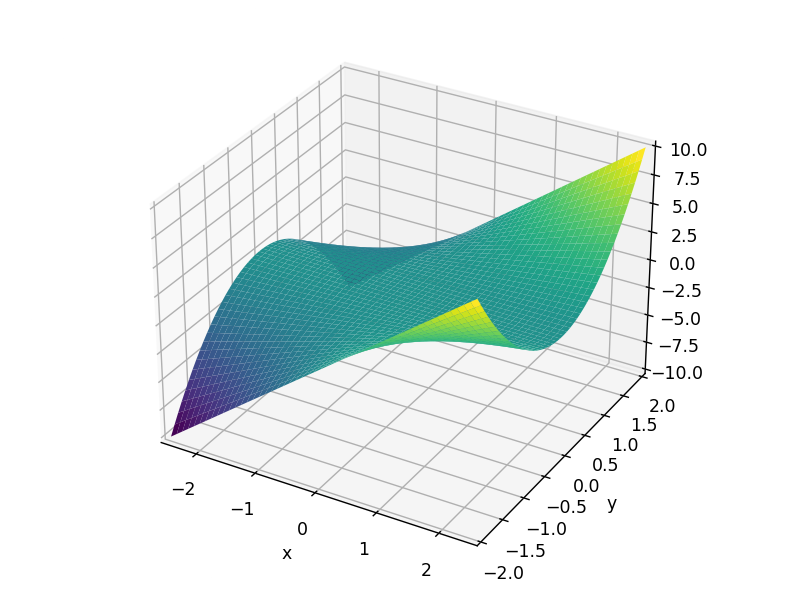

In [2]:
from sympy.plotting import plot3d             # importer plot3d
%matplotlib notebook                          

expr = x * y**2                               # Definer udtryk
plot3d(expr, (x, -2.5, 2.5), (y, -2, 2),      # Plot med fastsatte akse-intervaller
       xlabel = "x",
       ylabel = "y");     

## Konturer

Konturplot findes ved at lave en 2D-afbildning af værdien af den pågældende funktion af flere variable langs en linje. I tilfældet med en funktion af 2 variable ligger linjen i $xy$-planen, og konturen svarer til grafens skæring med den plan, der kan rejses vinkelret på $xy$-planen og som indeholder den pågældende linje. Se TK afsnit 1.2.1. De simpleste konturer fås ved at holde værdien af enten $x$ eller $y$ fast og så plotte $f(x,y)$ som funktion af den anden variabel. Vi vil her følge TK eksempel 1.6 og betragter funktionen:  

$f(x,y) = 2x^2+ 4x - y^2 + 4y$

Vi kan lave et konturplot ved at kigge på funktionens variation når $x$ varierer mens vi eksempelvis sætter $y = 1$:

<IPython.core.display.Javascript object>


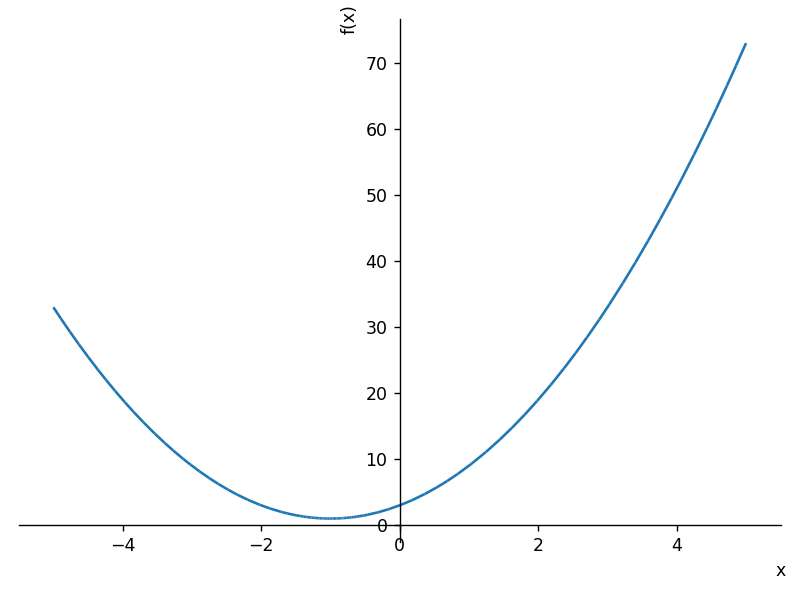

In [3]:
from sympy.plotting import plot

# Definer funktion
f = 2 * x ** 2 + 4 * x - y ** 2 + 4 * y

# Lav et plot
plot(f.subs(y, 1), (x, -5, 5));

For at få en fornemmelse af grafen for f, er et enkelt sådan snit ikke nok, så vi vil gerne lave en serie af konturplots. Vi kan her bruge <code>PlotGrid</code> fra <code>sympy.plotting</code>, som lader os sammensætte flere plots i en gitterstruktur. Vi bruger funktionen ved at skrive: 
```python
PlotGrid(antal_rækker, antal_kolonner, plot1, plot2 ...)
```
Vi kan altså nu lave flere plots og så sætte dem sammen. Hvis vi nu vil lave seks plots hvor $y = -1,...,4$ kan vi lave de enkelte grafer ved hjælp af en løkke og sætte dem sammen til sidst:

In [4]:
y_værdier = [-1, 0, 1, 2, 3, 4] # Definer liste
figurer   = []                  # Tom liste til figurer

for y_val in y_værdier:  # Pas på med at skrive y her, da vi allerede bruger den som symbol-variabel
    figur = plot(f.subs(y, y_val), show = False)   # Indsæt værdien af y og plot uden at vise grafen
    figur.axis_center = (0,0)                      # For at gøre de enkelte grafer ens, sætter vi den samme akseskæring
    figur.xlim = (-4, 4)                           # ... og samme akseafgrænsinger for x-aksen
    figur.ylim = (-15, 20)                         # ... og y-aksen
    figur.title = "y = {}".format(y_val)           # Tilføj titel til plot
    figurer.append(figur)                          # Vi tilføjer figuren til en liste af figurer

Vi har nu en liste af figurer, som er gemt i `figurer`. Selve listen siger os ikke så meget, blot:

In [5]:
figurer

Men hvis vi nu importerer `PlotGrid` og indsætter figurerne med `*figurer`, så får vi en en samling af figurerne. 

__Tip:__ `*` foran en liste, betyder at man "udpakker" listen. Derfor vil `*[1, 2, 3]` svarer til at skrive `1, 2, 3`. Dette bruges primært til at kalde funktioner, som kan tage et arbitært antal input.  

<IPython.core.display.Javascript object>


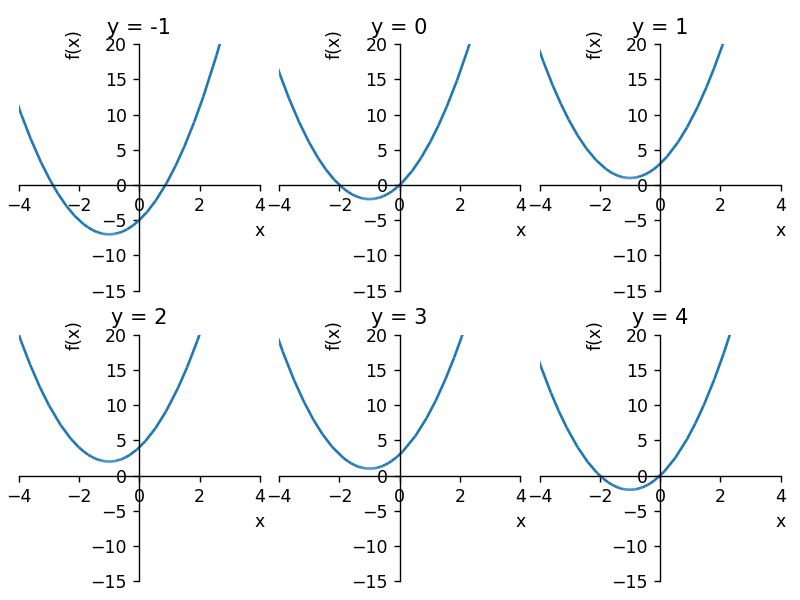

In [6]:
from sympy.plotting import PlotGrid            # Importer gitterplottefunktion
PlotGrid(2, 3, *figurer);                      # Nu samler vi de 6 figurer i et gitterplot

Det er værd at lægge mærke til at vi eksplicit har sat akseafgrænsningen til at være ens for alle 6 grafer. Ellers vil Python skalere dem fra figur til figur efter de enkelte grafers placering, hvilket vil gøre det svært at sammenligne de seks grafer. 
    
Vi kan nu gentage overstående, men skifte x-værdier:

<IPython.core.display.Javascript object>


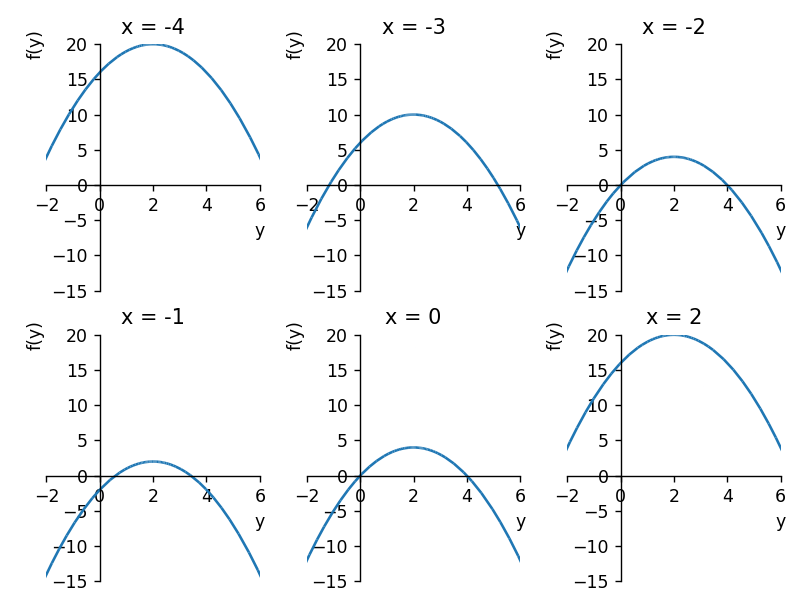

In [7]:
x_værdier = [-4, -3, -2, -1, 0, 2]                 # nu er det en liste af x-værdier
figurer   = []     

for x_val in x_værdier:
    figur = plot(f.subs(x, x_val), show = False)   # Indsætter nu værdier for x i stedet
    figur.axis_center = (0,0)                      
    figur.xlim = (-2, 6)                           # sæt nye mere passende grænser       
    figur.ylim = (-15, 20)                         # også her
    figur.title = "x = {}".format(x_val)           # Skriv nu "x =" i titlen 
    figurer.append(figur)                          
    
PlotGrid(2, 3, *figurer);                          # Nu samler vi de 6 figurer i et gitterplot

## Niveaukurver

Mens konturer er snit mellem grafen for en funktion og "opretstående planer", er niveaukurver snit med vandrette planer $z=c$ (se TK 1.2.2). Vi vil altså tegne løsninger til $f(x,y) = c$ i $xy$-planen. I SymPy kan vi få et hurtigt overblik ved at benytte funktionen <code>plot_contour</code> (bemærk at <code>plot_contour</code> her tegner niveaukurver og _ikke_ konturplot som navnet ellers kunne antyde) som importeres fra <code>sympy.plotting.plot</code>. 

Funktionen følger samme syntaks som <code>3dplot</code>, og giver os et bud på, hvordan niveaukurverne ligger. Desværre har vi ret begrænsede muligheder for selv at vælge indstillinger for denne funktion.

Her undersøger vi (ligesom i TK 1.10) funktionen:
$ f(x, y) = x^2 + 4y^2 $


<IPython.core.display.Javascript object>


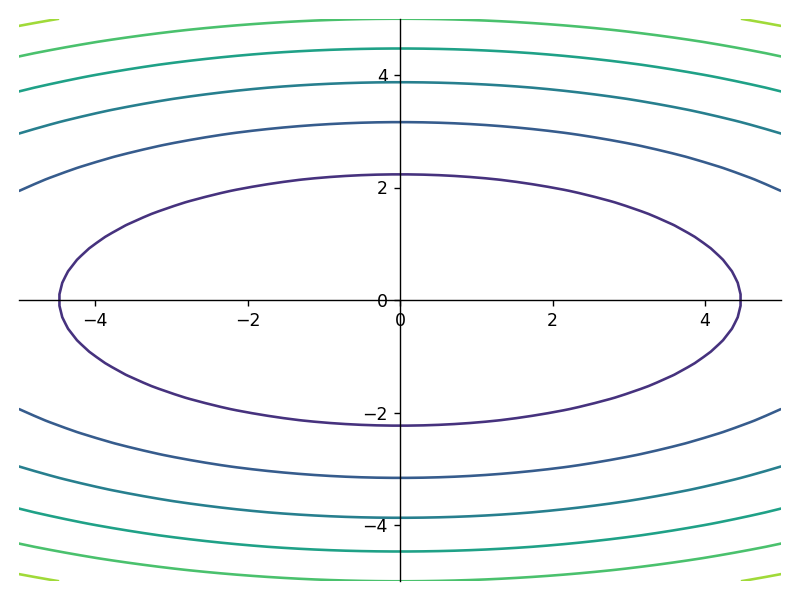

In [8]:
from sympy.plotting.plot import plot_contour
f = x ** 2 + 4 * y ** 2

niveau = plot_contour(f, (x, -5, 5), (y, -5, 5));

Linjerne i plottet markere altså de sammenhørende $(x,y)$-værdier, hvor $f$ antager en bestemt værdi. Vi kan se at grafen for funktionen er en aflang bakke (eller fordybning), der er symmetrisk omkring x-aksen. Funktionen <code>plot_contour</code> er ret ny i SymPy-biblioteket og er ikke helt færdigudviklet, og det er desværre ikke muligt manuelt at bestemme hvilken værdier, linjerne skal tegnes ved. 

Vi har også muligheder for selv at gøre arbejdet ved at benytte sympy til at tegne såkaldte implicitte udtryk, altså eksempelvis alle punkter i $xy$-planen, der opfylder, at $f(x,y) = c$ for et givet c. Dette illustreres herunder for den interesserede læser.

Vi betragter nu (jvf TK 1.11) $f$ givet ved:
$$f(x,y) = x^2 - xy + y$$

Vi benytter <code>plot_implicit</code> fra <code>sympy.plotting</code> til at finde niveaukurven for $c = 3$. Vi danner først en ligning ved at skrive <code>sp.Eq(udtryk, c)</code> og så grænser for, hvor den skal plotte det henne, på samme måde som <code>contour_plot</code> og <code>plot3d</code>.

<IPython.core.display.Javascript object>


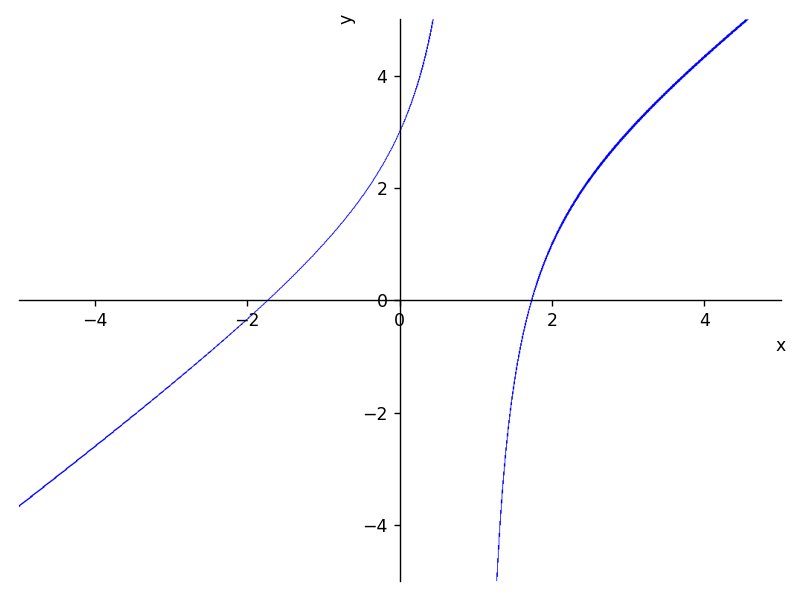

In [9]:
f = x ** 2 - x * y + y

from sympy.plotting import plot_implicit
plot_implicit(sp.Eq(f, 3), (x, -5, 5), (y, -5, 5));

Hvis vi vil tegne flere niveaukurver i samme koordinatsystem og selv vil bestemme hvilke værdier, der skal tegnes kurver for, kan vi på samme måde som ved konturplottene ovenfor lave en løkke, hvor vi går igennem de ønskede værdier:

__Tip__: Når vi skriver `line_color = f"C{i}"`, så vælger SymPy at plotte med den i'te farve i matplotlibs bibliotek. Vi kan derfor loope over `range(len(c_værdier))` i nedenstående, således at  `i` angiver en bestemt niveaukurve, og så kan vi få værdien for c ved `c_værdier[i]`.

In [10]:
c_værdier = [-3, -1, 1, 3, 5]
figurer   = []

# Vi sætter et loop op over vores værdier for c
for i in range(len(c_værdier)):
    
    # Lav et nyt implicit plot for hver værdi af c:
    ny_figur = plot_implicit(sp.Eq(f, c_værdier[i]), 
                             line_color = f"C{i}",
                             show       = False)
    
    # Tilføj denne figur til en liste
    figurer.append(ny_figur)

figurer

For nu at sætte det sammen, laver vi nu en figur med den første af de plots, som vi har lavet, og så looper vi over resten af listen og indsætter de figurer:

<IPython.core.display.Javascript object>


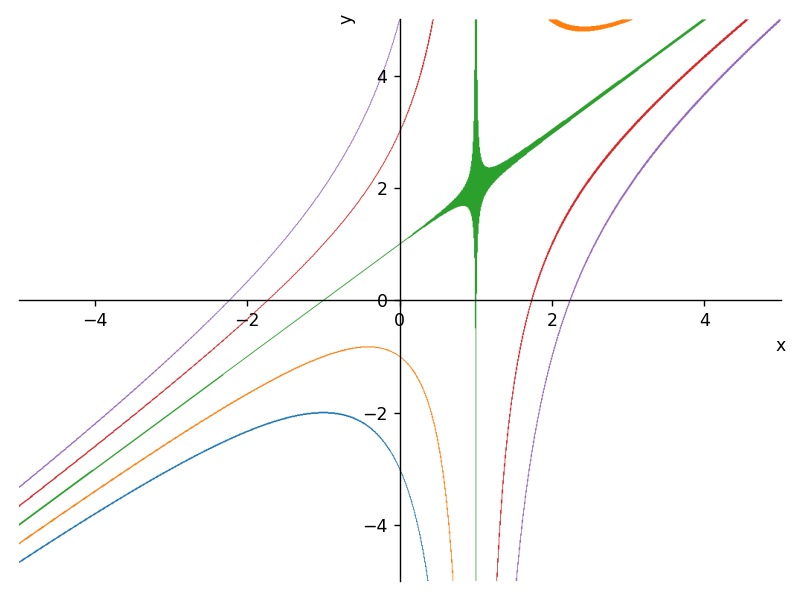

In [11]:
vis_figur = figurer[0]              #Lav en ny figur ud fra den første figur i listen

# Loop nu over resten af listen ved at indeksere med [1:]
for tilføj_figur in figurer[1:]:
    vis_figur.append(tilføj_figur[0])
    
# Vis figuren
vis_figur.show()

Desværre understøtter `plot_implicit` ikke, at vi kan give linjerne labels. Det bedste bud er at kende rækkefølgen af de første kurve-farver i matplotlib, som er blå, orange, grøn, og så må man prøve at danne sig et overblik ud fra dette.

Vi ser at Python finder at $f=1$ ikke kun er opfyldt langs linjerne $x = 1$ og $y=1+x$ (hvilket vi nemt kan indse ved at indsætte i udtrykket for $f$), men også i et område nær hvor disse to linjer krydser. Dette skyldes at Python/SymPy løser $f(x,y)=c$ numerisk med en given (og tilsyneladende ikke ret høj) opløsning. Ved at betragte $f$ i 3D kan vi se at funktionen rigtigt nok er meget flad omkring $(x,y)=(1,2)$:

<IPython.core.display.Javascript object>


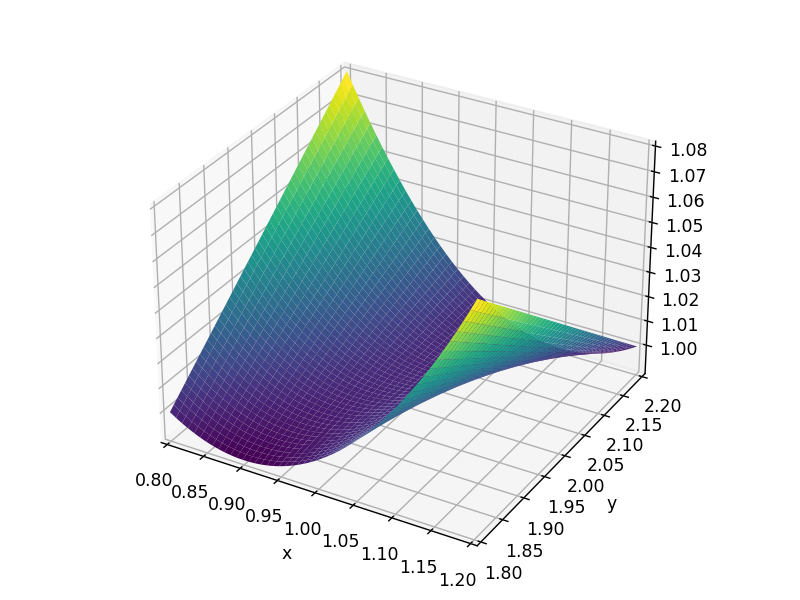

In [12]:
figur = plot3d(f, (x, 0.8, 1.2), (y, 1.8, 2.2),
              xlabel = "x",
              ylabel = "y");